# COGS 138 Final Project

Permissions
Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public.

[X ] YES - make available


[ ] NO - keep private

## Overview
Though research dementia has been conducted many times throughout science history, we would like to explore this world ourselves. We have taken two datasets from a public source that include many demographic factors about demented and nondemented patients, and we will use those datasets to perform an exploratory analysis of fluctuations in brain volume. Additionally, using numerical values of normal brain volume in male and female patients, we want to perform an Pearson's Correlation Coefficient to compare normal brain volume to the brain volume of someone who has dementia separated by gender. Moving forward into our project, we will prototype a predicitive model to predict dementia using various images found on a publicly available dataset. Using computer vision with a python package called 'tensorflow', we will demo our predicitve model using images ranging from nondemented, very mild demented, and mild demented. Our purpose for using not as severe case images for diagnoses dementia patients is because we want to analyze whether dementia can be predicted and caught early on. Which, in turn, could create new opportunities for better treatment plans and diagnosis.

## Names

- Fatima Enriquez
- Ashley Chavarria
- Tiffany Gunawan
- Hiroki Ito

## Reseach Question

In this project, our group wants to explore the differences between demented and nondemented patients. This topic piqued our interest particularly because it is a very common symptom that a lot of people and it has been widely studied by other scientist. As a result, creating better diagnostic tools and improving treatment plans and management. We also take into consideration those who take care of loved ones with dimentia, as it has been discussed by many people as a physicall and mentally exhausting event. There are a plethora of Reddit posts we have found in our research of this topic of people describing the saddness, anger, and frustration that comes along with treating dementia - some even finding humour in their situations.1 After our findings via the internet, we grew sympathy and a greater understanding of the effects of dementia on not just patients who have it, but those around them as well.

^ lottieslady (Dec, 2023) Those who have had a parent/friend/loved one with dementia, how did you help them? How did you help yourself cope with their declining state? Reddit. https://www.reddit.com/r/AskOldPeople/comments/190u5qt/those_who_have_had_a_parentfriendloved_one_with/

## Background & Prior Work

### Introduction
In this project, our group wants to explore the differences between demented and nondemented patients. This topic piqued our interest particularly because it is a very common symptom that a lot of people and it has been widely studied by other scientist. As a result, creating better diagnostic tools and improving treatment plans and management. We also take into consideration those who take care of loved ones with dimentia, as it has been discussed by many people as a physicall and mentally exhausting event. There are a plethora of Reddit posts we have found in our research of this topic of people describing the saddness, anger, and frustration that comes along with treating dementia - some even finding humour in their situations.</a>[<sup>1</sup>](#cite_note-1) After our findings via the internet, we grew sympathy and a greater understanding of the effects of dementia on not just patients who have it, but those around them as well. 

1. <a name="cite_note-1"></a>[^](#cite_ref-1) lottieslady (Dec, 2023) Those who have had a parent/friend/loved one with dementia, how did you help them? How did you help yourself cope with their declining state? *Reddit*. https://www.reddit.com/r/AskOldPeople/comments/190u5qt/those_who_have_had_a_parentfriendloved_one_with/




### Background Work

According to the Alzheimer's Association, Demetia is a general term for loss of memory, language, problem-solving and other thinking abilites that can vary in severity, overall interfering with a person's daily life. It's not a single disease, rather this umbrella term to describe a collection of symptoms if they are living with a disease, most notably Alzheimer's Disease. </a>[<sup>1</sup>](#cite_note-1) Alzheimer's is a very common type of dementia with progressive symptoms, starting with mild memory loss and possibly leading to the loss of ability to carry on a conversation and respond to your general surroundings. According to the CDC, scientists do not fully know what causes Alzheimer’s disease, but there are multiple factors that can affect each person differently: age, family history, changes in the brain, and possibly education, diet, and environment. Most of what is known are the symptoms of Alzheimer’s, typically regarding memory problems being the first warning sign followed by difficulty completing familiar tasks, misplacing things, and changes in mood and behavior. </a>[<sup>2</sup>](#cite_note-2) Our group’s decision to focus on brain atrophy in Dementia patients is per our discussion for a need to create better diagnostic and prognostic tools in managing this debilitating condition.

From what we knew before, there is no single test that can determine if a person is living with Dementia. Recently, however, there has been a new usage of biomarkers to help diagnose Alzheimer’s disease, particularly focusing on brain imaging. According to the National Institute on Aging, brain scans are allowing doctors to see different factors that may help in diagnosis via CT, MRI, and PET scan. </a>[<sup>3</sup>](#cite_note-3) Our group specifically wanted to focus on MRI for this project due to its versatility. MRIs can show areas of the brain that have shrunk and repeated MRIs can show a person's brain changes over time, which may lead to evidence of shrinkage and can be use in many diagnoses. </a>[<sup>3</sup>](#cite_note-3)

Magnetic resonance imaging is a noninvasive technique that uses magnetic fields and radio waves to produce detailed images of body structures, and similar to CT scans, MRIs can show areas of the brain that have shrunk. Additionally, repeated MRIs can show a person’s brain changes over time, which may lead to evidence of shrinkage and can be used in many diagnoses. </a>[<sup>4</sup>](#cite_note-4) This has our group wondering, if MRIs can be used to note shrinkage in the brain, and according to the NIA, Alzheimer’s results as neuronal death which can affect the brain via tissue death and shrinkage, then we can possibly use MRI as a predictive method for Dementia. 

In a logitudinal OHSU study done to analyze the rate of brain volume loss in Dementia patients, it was found that the rate of brain volume loss differed greatly among those with intact cognition and stable mild cognitive impairment. It was suggested that monitoring brain volume loss is a key indicator in predicting dementia before symptoms appear. </a>[<sup>5</sup>](#cite_note-5) Additionally, in a prior study done in Sporadic Alzheimer's Disease, it was found that volume loss across the brain can predict the likelihood of developing dementia. </a>[<sup>6</sup>](#cite_note-6) Essentially, the quantification of volume loss across the brain might provide a good prediction of who is in the early stages of diseases like Alzheimer's. 


Therefore, quantifying volume loss throughout the brain could offer valuable insights into identifying individuals in the early stages of diseases like Alzheimer's, aiding in early intervention and management strategies. For this project, we would like to take into account the possibility of a differece between gender in Dementia diagnosis. This is especially so since women have a higher risk of developing Dementia during their lifetime where around twice as many women have Alzheimer's Disease compared to men. </a>[<sup>7</sup>](#cite_note-7)

Thus, for this project, we chose to separate it into two parts. 

1. Comparisons in normal brain volume and demented brain volume between males and females
2. Computer vision application of multiple MRI images of patients to prototype a predictive model for the prediction of Alzheimer's Disease


1. <a name="cite_note-1"></a>[^](#cite_ref-1) Centers for Disease Control and Prevention. (2020, October 26) Alzheimer’s Disease and Related Dementias. *Alzheimer's Disease and Healthy Aging*. https://www.alz.org/alzheimers-dementia/what-is-dementia

2. <a name="cite_note-2"></a>[^](#cite_ref-2) Alzheimer's Society. (n.d.) What is Dementia? *Alzheimer's Disease and Dementia*. https://www.alz.org/alzheimers-dementia/what-is-dementia

3. <a name="cite_note-3"></a>[^](#cite_ref-3) National Institute on Aging. (2022, January 21) How Biomarkers Help Diagnose Dementia.  *Alzheimer's symptoms and diagnosis*. https://www.alz.org/alzheimers-dementia/what-is-dementia

4. <a name="cite_note-4"></a>[^](#cite_ref-4) John Hopkins Medicine. (n.d.) Magnetic Resonance Imaging (MRI). *Treatments, Tests and Therapies*. https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/magnetic-resonance-imaging-mri
 
5. <a name="cite_note-5"></a>[^](#cite_ref-5) Oregon Health & Science University. (2004, April 28). OHSU Study:Rate of Brain Volume Loss Predicts Dementia. *OHSU News*. https://news.ohsu.edu/2004/04/28/ohsu-study:rate-of-brain-volume-loss-predicts-dementia

6. <a name="cite_note-6"></a>[^](#cite_ref-6) National Library of Medicine. (2013, October 11). Biomarker-based prediction of progression in MCI: Comparison of AD signature and hippocampal volume with spinal fluid amyloid-β and tau. *Front Aging Neuroscience*. https://pubmed.ncbi.nlm.nih.gov/24130528/

7. <a name="cite_note-7"></a>[^](#cite_ref-7) Alzheimer's Society. (2024, March 8). Why is dementia different for women?. *About Dementia*. https://www.alzheimers.org.uk/blog/why-dementia-different-women#:~:text=Women%20have%20a%20greater%20risk,of%20dementia%20–%20compared%20to%20men.

## Installations

In [1]:
# pip install seaborn
# pip install Pillow
# pip install opencv-python
# pip install tensorflow

## Imports: 

In [1]:
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns
import tensorflow as tf

from PIL import Image
import glob, os

from pathlib import Path
import imghdr

import cv2
from pathlib import Path

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array




2024-06-04 10:33:09.240794: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/8t/lwxcj5gx513cjy7fr6l1ljx80000gn/T/ipykernel_1285/2502633114.py:14: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# Part 1: Whole Brain Volume Test

In the first part of our project, we will be focusing on 2 datasets taken form Oasis, a publicly available source for data on demented and nondemented patients.</a>[<sup>1</sup>](#cite_note-1) In the next parts, we will clean the data perform an exploratory analysis to better understand what the data is demonstrating.

1. <a name="cite_note-1"></a>[^](#cite_ref-1) Open access series of imaging studies (OASIS). (n.d.). https://sites.wustl.edu/oasisbrains/ 

# Data Overview: Wrangling & Cleaning 

### Dataset #1 
- Name: Oasis_cross_sectional
- Link to dataset: https://sites.wustl.edu/oasisbrains/home/oasis-1/
- Number of observations: 436
- Number of variables: 12

For this dataset, we will be particularly focused on gender (M/F), Estimated total Intracranial volume measured in mm3 (eTIV), and the Clinical Dementia Rating (CDR) - (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD). The dataset also includes other demographics such as:
- Handedness (Hand)
- Age (Age)
- Years of Educaiton (EDUC)
- Socioeconomic status (SES)

And clinical information:
- Mini-Mental State Examination Score (MMSE)
- Estimated total intracranial volume (eTIV)
- Atlas Scaling Factor (ASF)
- Normalized Whole-Brain Volume (nWBV)

As we delve into exploratory analysis, we really only care about the gender of the patient and their normalized whole-brain volume. With this dataset, we will clean it and merge it with Dataset #2 to create a larger dataset to perform more analysis.

In [2]:
oasis_cross_sectional=pd.read_csv('Dataset_logs/oasis_cross-sectional.csv')

In [3]:
oasis_cross_sectional.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [4]:
oasis_cross_sectional.shape

(436, 12)

In [5]:
oasis_cross_sectional.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

In [6]:
oasis_cross_sectional.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [7]:
# Since we only care about sex, brain volume and CDR, we will drop all other columns
# We will also arrange our dataset on the 'M/F' column for easier merging

oasis_cross_sectional=oasis_cross_sectional.drop(columns=['Age','Hand', 'Educ', 'SES', 'MMSE', 'ASF', 'Delay', 'nWBV'])
oasis_cross_sectional=oasis_cross_sectional.sort_values('M/F', ascending=False)
oasis_cross_sectional.head()

,ID,M/F,CDR,eTIV
134,OAS1_0144_MR1,M,NaN,1799
119,OAS1_0129_MR1,M,NaN,1514
121,OAS1_0131_MR1,M,NaN,1637
122,OAS1_0132_MR1,M,NaN,1596
300,OAS1_0332_MR1,M,0.0,1734


In [8]:
# Removing observations without a CDR measurement
oasis_cross_sectional = oasis_cross_sectional.dropna(subset=['CDR'])
oasis_cross_sectional

,ID,M/F,CDR,eTIV
300,OAS1_0332_MR1,M,0.0,1734
124,OAS1_0134_MR1,M,1.0,1494
125,OAS1_0135_MR1,M,0.0,1561
361,OAS1_0399_MR1,M,1.0,1569
360,OAS1_0398_MR1,M,0.0,1769
...,...,...,...,...
185,OAS1_0203_MR1,F,0.0,1360
183,OAS1_0201_MR1,F,0.0,1460
182,OAS1_0200_MR1,F,0.0,1366
179,OAS1_0197_MR1,F,0.0,1154


In [9]:
# Descriptive statistics for eTIV and CDR
# Note the lowest brain volume detected was 1123 mm3 and the max was 1992 mm3 between male and female

oasis_cross_sectional.describe(include=[np.number])

,CDR,eTIV
count,235.000000,235.000000
mean,0.285106,1459.497872
std,0.383405,160.368070
min,0.000000,1123.000000
25%,0.000000,1348.000000
50%,0.000000,1447.000000
75%,0.500000,1548.000000
max,2.000000,1992.000000


### Dataset #2
- Name: Oasis_longitudinal_demographics
- Link to dataset: https://sites.wustl.edu/oasisbrains/home/oasis-2/
- Number of observations: 373
- Number of variables: 15

Simiarly with the first dataset, we will be particularly focused on gender (M/F), Estimated total Intracranial volume measured in mm3 (eTIV) and the Clinical Dementia Rating (CDR) - (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD). 


The dataset also includes other demographics such as:
- Handedness (Hand)
- Age (Age)
- Years of Educaiton (EDUC)
- Socioeconomic status (SES)

And clinical information:
- Mini-Mental State Examination Score (MMSE)
- Atlas Scaling Factor (ASF)
- Normalized Whole-Brain Volume (nWBV)

After cleaning the data below, we will merge this dataset with Dataset #1 by their Clinical Dementia Rating (CDR). 

In [10]:
oasis_longitudinal_demographics=pd.read_csv('Dataset_logs/oasis_longitudinal_demographics.csv')

In [11]:
oasis_longitudinal_demographics.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [12]:
oasis_longitudinal_demographics.shape

(373, 15)

In [13]:
oasis_longitudinal_demographics.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [14]:
oasis_longitudinal_demographics.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [15]:
# Since we only care about sex and brain volume, we will drop all other columns
# Removing rows of nondemented patients, as our focus is on people who are already demented
# We will also arrange our dataset on the 'M/F' column for easier merging

oasis_longitudinal_demographics=oasis_longitudinal_demographics[oasis_longitudinal_demographics['Group'] != 'Nondemented']
oasis_longitudinal_demographics=oasis_longitudinal_demographics.drop(columns=['Subject ID', 'Age', 'Group', 'Visit', 'MR Delay', 'Hand', 'EDUC', 'SES', 'MMSE', 'ASF', 'nWBV'])
#oasis_longitudinal_demographics=oasis_longitudinal_demographics.sort_values('M/F', ascending=False)
#oasis_longitudinal_demographics.head()

In [18]:
oasis_longitudinal_demographics=oasis_longitudinal_demographics.sort_values('M/F', ascending=False)
oasis_longitudinal_demographics.head()

,ID,M/F,CDR,eTIV
2,OAS2_0002_MR1,M,0.5,1678
123,OAS2_0058_MR1,M,0.5,1315
261,OAS2_0127_MR1,M,0.0,1644
257,OAS2_0124_MR2,M,0.5,1479
256,OAS2_0124_MR1,M,0.5,1463


In [16]:
# Renaming columns to match

oasis_longitudinal_demographics=oasis_longitudinal_demographics.rename(columns={'MRI ID':'ID'})

In [17]:
# Descriptive statistics for nWBV
# Note the lowest brain volume detected was 0.646 and the max was 0.81 between male and female

oasis_longitudinal_demographics.describe(include=[np.number])

,CDR,eTIV
count,183.000000,183.000000
mean,0.587432,1480.475410
std,0.332334,166.732688
min,0.000000,1143.000000
25%,0.500000,1357.000000
50%,0.500000,1463.000000
75%,0.500000,1568.500000
max,2.000000,1957.000000


In the cell below, to make the dataset easier to work with, we will merge the dataset on their CDR and M/F columns. All columns with '_x' will be data from Dataset #1 and '_y' will be data from Dataset #2. We will be left with a dataset joined together by their clinical ratings to make an easier distinction between, for example, female patients with mild dementia, male patients with moderat dementia, etc. The values will be in descending order from 0.0-2.0. 

- Name: brain_volume
- Number of observations: 6164
- Number of variables: 4

In [19]:
# Merging the two datasets on sex and brain volume

brain_volume = pd.merge(oasis_cross_sectional, oasis_longitudinal_demographics, on=['CDR', 'M/F'])
brain_volume

,ID_x,M/F,CDR,eTIV_x,ID_y,eTIV_y
0,OAS1_0332_MR1,M,0.0,1734,OAS2_0127_MR1,1644
1,OAS1_0332_MR1,M,0.0,1734,OAS2_0176_MR2,1398
2,OAS1_0332_MR1,M,0.0,1734,OAS2_0176_MR1,1404
3,OAS1_0332_MR1,M,0.0,1734,OAS2_0144_MR1,1704
4,OAS1_0332_MR1,M,0.0,1734,OAS2_0020_MR1,1587
...,...,...,...,...,...,...
6159,OAS1_0185_MR1,F,1.0,1314,OAS2_0064_MR1,1462
6160,OAS1_0185_MR1,F,1.0,1314,OAS2_0120_MR1,1409
6161,OAS1_0185_MR1,F,1.0,1314,OAS2_0114_MR2,1309
6162,OAS1_0185_MR1,F,1.0,1314,OAS2_0106_MR2,1489


# Data Visualization

The CDR Scoring Table offers descriptive references to assist clinicians in assigning suitable ratings using interview information and clinical assessment. Alongside domain-specific ratings, an overall CDR™ score can be computed using a CDR™ Scoring Algorithm. </a>[<sup>1</sup>](#cite_note-1) This scoring system is valuable for defining and monitoring a patient's degree of impairment or dementia over time:

    0 = Normal
    0.5 = Very Mild Dementia or Questionable
    1 = Mild Dementia
    2 = Moderate Dementia



1. <a name="cite_note-1"></a>[^](#cite_ref-1) Washington University School of Medicine in St. Louis. (n.d.). Knight Alzheimer Disease Research Center. *Department of Neurology* https://knightadrc.wustl.edu/professionals-clinicians/cdr-dementia-staging-instrument/

In [20]:
### Histogram for eTIV

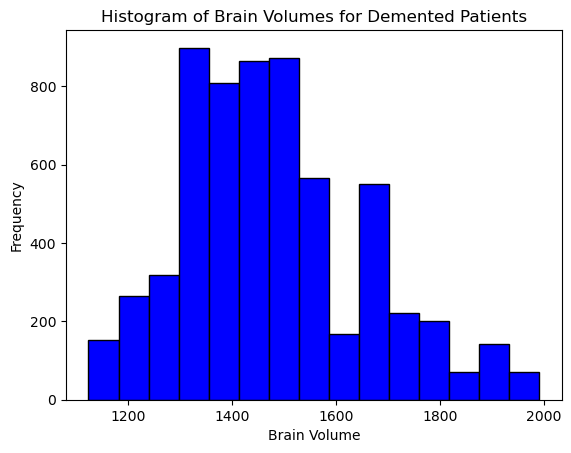

In [21]:
# Plotting histogram to show the distribution of brain volume derived from demented patients in Dataset 1
plt.hist(brain_volume['eTIV_x'], bins=15, color='blue', edgecolor='black')
plt.xlabel('Brain Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Brain Volumes for Demented Patients')
plt.show()

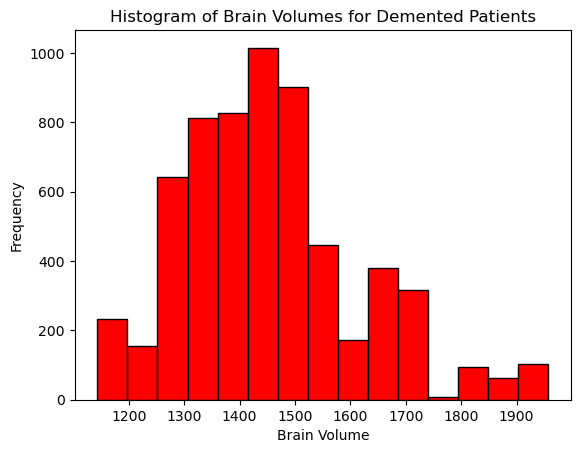

In [23]:
# Plotting histogram to show the distribution of brain volume derived from demented patients in Dataset 2
plt.hist(brain_volume['eTIV_y'], bins=15, color='red', edgecolor='black')
plt.xlabel('Brain Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Brain Volumes for Demented Patients')
plt.show()

For ease of visualization, we will merge the datasets on eTIV to get a general picture of the frequency of brain volumes in our datasets. This method does have limitations which we will explain more in detail later into the project.

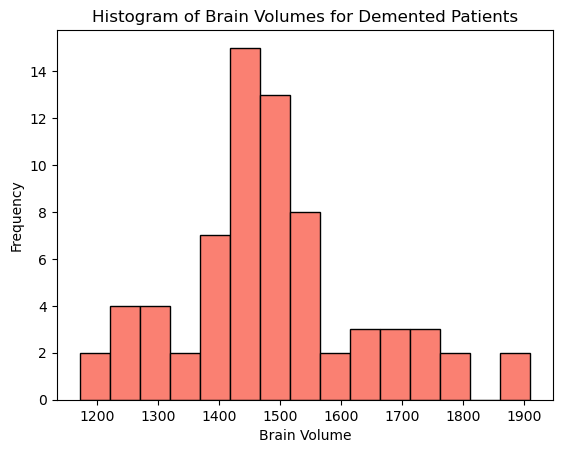

In [24]:
# Combine on eTIV
eTIV_combined = pd.merge(oasis_cross_sectional, oasis_longitudinal_demographics, on=['CDR', 'M/F', 'eTIV'])

plt.hist(eTIV_combined['eTIV'], bins=15, color='salmon', edgecolor='black')
plt.xlabel('Brain Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Brain Volumes for Demented Patients')
plt.show()

#### Findings:
Between the two datasets in their brain volume, their averages lie between 1200 to 1600 mm3. Additionally, it's important to note that the highest values recorded are different and have the potential to average out. In Dataset #1 adn #2, the highest calculated brain volume is 2000 mm3. Using the histogram with combined data, it's much easier to specify that the most frequent brain volume in demented patients is between 1400-1500 mm3. 

### Bar plot for CDR by Gender

A stacked bar plot is effective for comparing the distribution of Clinical Dementia Rating (CDR) across male and female (M/F) categories, allowing clear visualization of differences in dementia severity between genders and providing a comprehensive view of subgroup compositions within each CDR level. You can see below that there are more very mild demented participants that are than female.

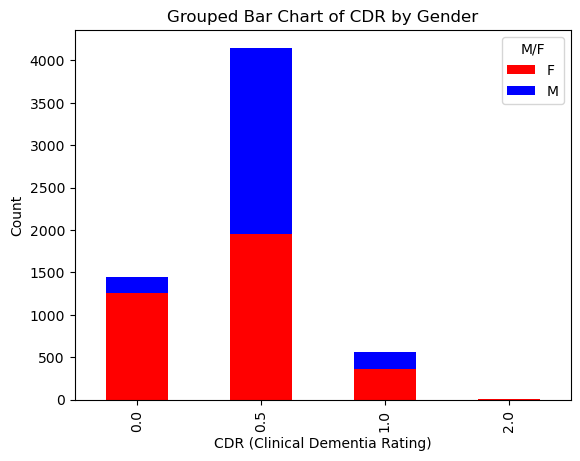

In [26]:
grouped_data = brain_volume.groupby(['CDR', 'M/F']).size().unstack()

colors = ['red', 'blue']
grouped_data.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('CDR (Clinical Dementia Rating)')
plt.ylabel('Count')
plt.title('Grouped Bar Chart of CDR by Gender')
plt.legend(title='M/F')
plt.show()

In [27]:
male_count = brain_volume[brain_volume['M/F'] == 'M'].shape[0]
female_count = brain_volume[brain_volume['M/F'] == 'F'].shape[0]

male_count, female_count

(2590, 3574)

#### Findings
There are not very many moderate dementia patients. After performing more intricate analysis, we believe it is important to show the counts of data compiled that are either male or female. This is a possible limitation due to the 984 more female participant data that may skew the visualizations we see above. Overall though, men on average according to the data present very milkd dementia more than any other category, women perform similarly but at a much lower rate.

### Scatter plot for CDR and eTIV associtation

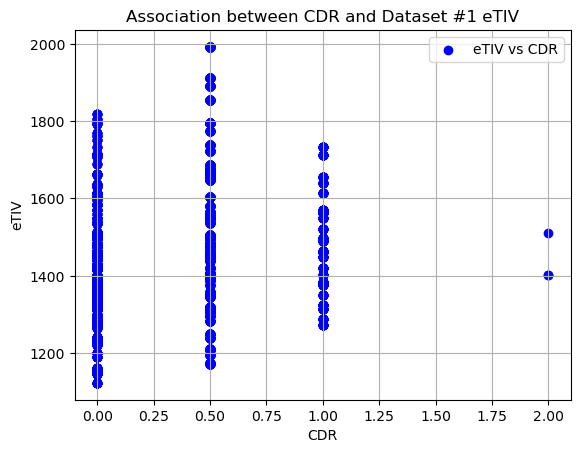

In [28]:
# Here is a scatter plot for CDR using brain volume data form Dataset #1

plt.scatter(brain_volume['CDR'], brain_volume['eTIV_x'], color='blue', label='eTIV vs CDR')
plt.xlabel('CDR')
plt.ylabel('eTIV')
plt.title('Association between CDR and Dataset #1 eTIV')
plt.legend()
plt.grid(True)
plt.show()

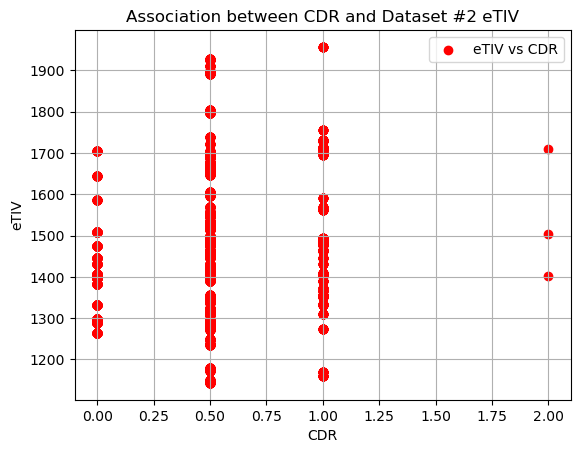

In [29]:
# Here is a scatter plot for CDR using brain volume data form Dataset #2

plt.scatter(brain_volume['CDR'], brain_volume['eTIV_y'], color='red', label='eTIV vs CDR')
plt.xlabel('CDR')
plt.ylabel('eTIV')
plt.title('Association between CDR and Dataset #2 eTIV')
plt.legend()
plt.grid(True)
plt.show()

Just as above, for ease of visualization we will combine both datasets on CDR, M/F, and eTIV to see the averages between the two. This method will decrease our number of observations to 69 total compared to our previous 6164 observations. Later, we will dscuss the limitations of demonstrating our data as such. For now, we will combine the columns to observe the average brain volumes by their Clinical Dementia Rating from 0-2. 

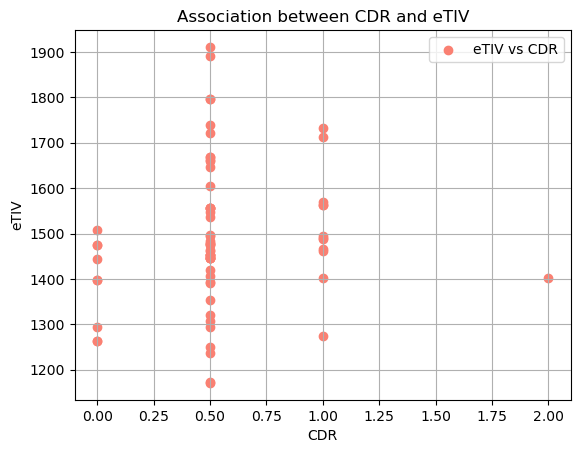

In [30]:
plt.scatter(eTIV_combined['CDR'], eTIV_combined['eTIV'], color='salmon', label='eTIV vs CDR')
plt.xlabel('CDR')
plt.ylabel('eTIV')
plt.title('Association between CDR and eTIV')
plt.legend()
plt.grid(True)
plt.show()

#### Findings:
- There is a very interesting visualization presented in the scatterplot. In Dataset #1, most of the Clinical Dementia Rating is as a value of 0.00 (Normal) while in Dataset #2, the Clinical Dementia Rating is most common at a value of 0.50 (Very Mild Demented). It's important to note there are a few outliers in the data where very few cases present a CDR of 2 (Moderate Dementia). 
- Taking into account the brain volume, let's separate the analysis for easier understanding:
    - Dataset #1: eTIV lowers as the CDR increases. The highest volume was measured at 0.850 with a CDR value of 0.0. Suggesting a negative correlation
    - Dataset #2: eTIV lowers as CDR increases. The highest volume was measrued at slightly above 0.80 with a CDR value of 0.50. As well suggesting a negative correlation with some tweaks, but over all it shows a similar trend to that of the first dataset
    
After combining the datasets, can see one very distinct trend in that patients who have a CDR rating of 0.50. That is, their brain volumes tend to hang around the 1300-1500 value. There are also some peculiarities in the data such taht the CDR rating of 2.0 have a higher brain volume than some of those two have a CDR rating of 0, suggesting there could be some skew in the data.

In [19]:
dementia_dataset = pd.read_csv('Dataset_logs/dementia_dataset.csv') 
dementia_dataset.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## Exploratory Data Analysis

To investigate the relationship between two variables, M/F and eTIV, we will person a bivariate analysis to note any strong connections. Additionally, it will help make the data easier to interpret and understand through data visualization.

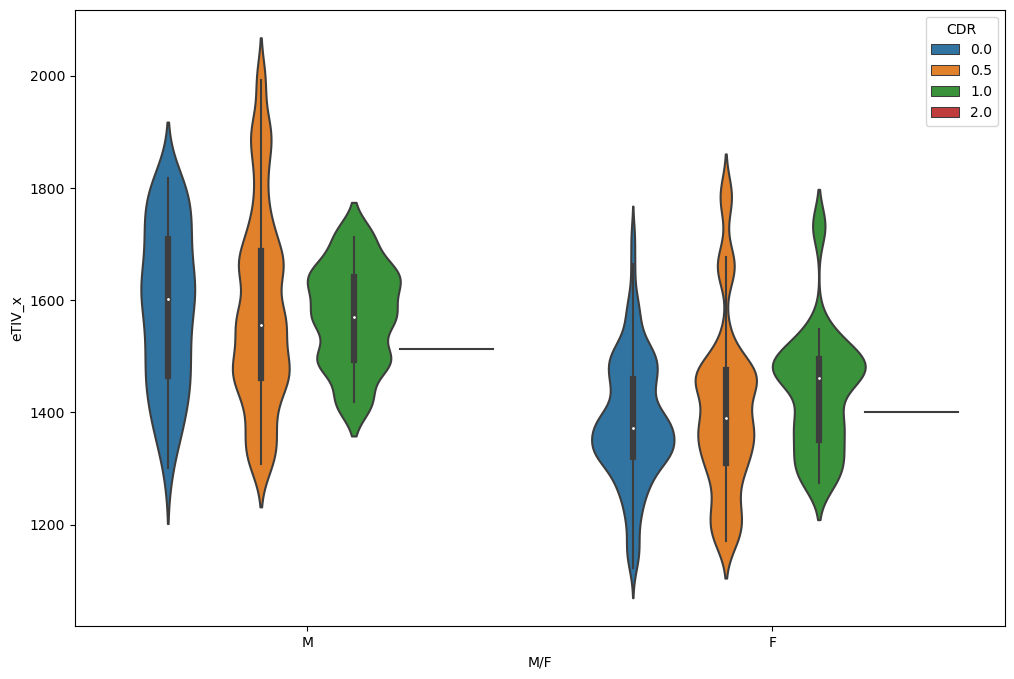

In [31]:
# Violin plot demonstrating brain volume separating M/F based on their CDR values
# This plot is specified for Dataset #1

plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="eTIV_x",hue="CDR", data=brain_volume)
plt.show()

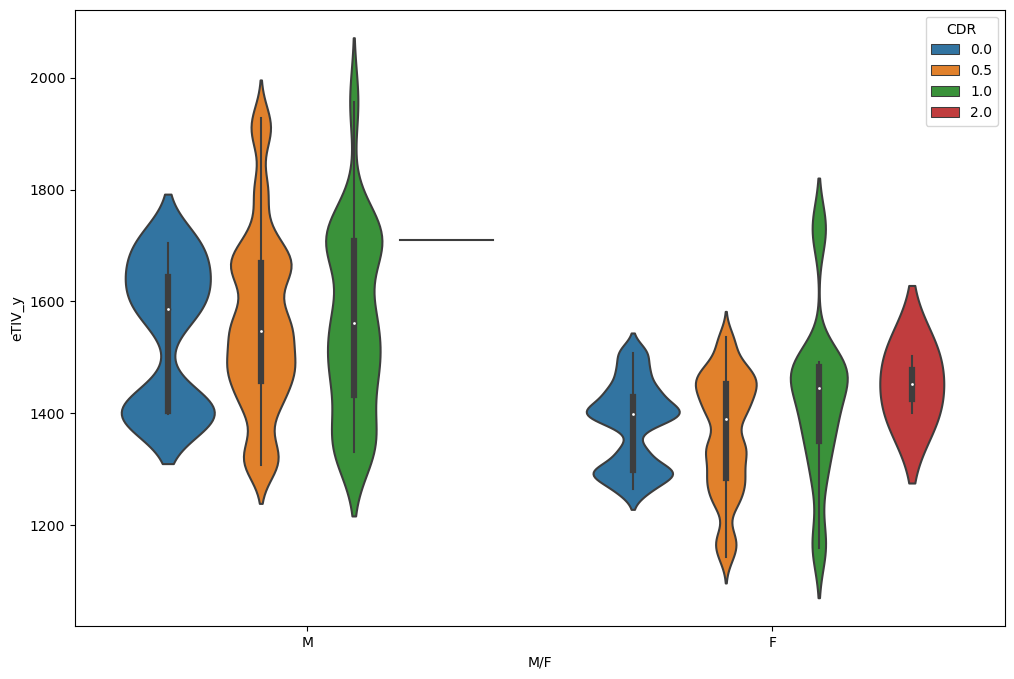

In [32]:
# Violin plot demonstrating brain volume separating M/F based on their CDR values
# This plot is specified for Dataset #2

plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="eTIV_y",hue="CDR", data=brain_volume)
plt.show()

Using the combined dataset which merges all columns other than ID, below is a violin plot for the 69 resulting observations. All other variables remain the same with brain volume on the y-axis, gender on the x-axis and CDR as the table which separates the M/F category.

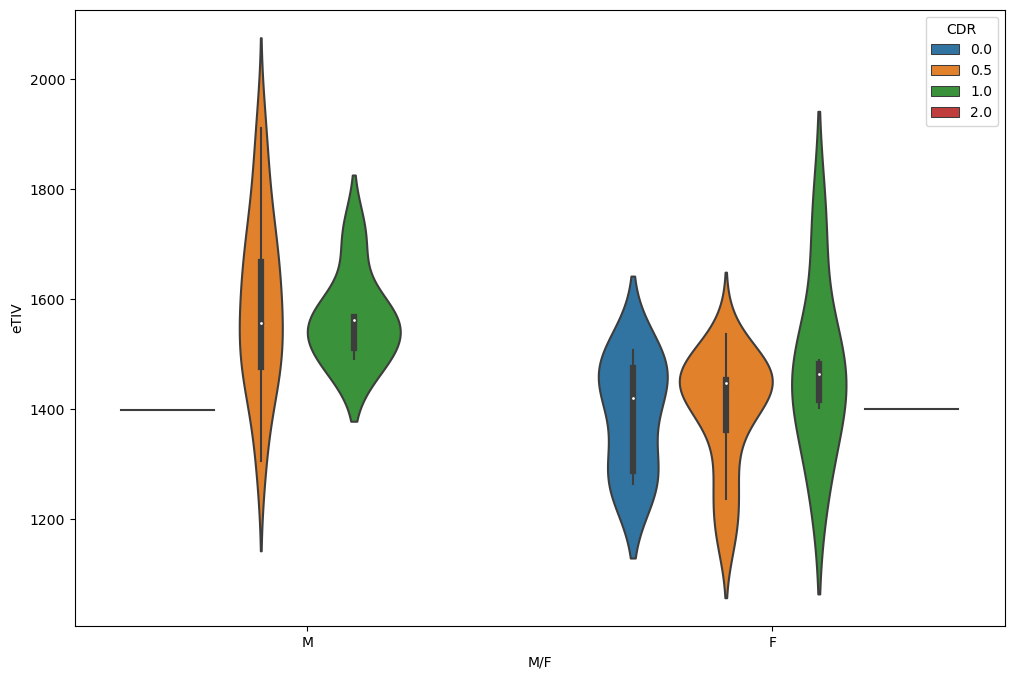

In [33]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="eTIV",hue="CDR", data=eTIV_combined)
plt.show()

What's very interesting is that among all the plots, even when brain volume was not merged, the brain volume demonstrated in demented patients was lower on average for female patients than male patients. In the plot above, we generally have more representation for female patients in the CDR index, showing that their medians are at a lower eTIV value than males. Additionally, there are only median horizontal lines on the plot which represent the 0.0 CDR index for males and the 2.0 CDR index for females. This could suggest there is very minimal data form the merged sets. However, from the plots above, we can see that there is data present for those two ranges in the second dataset. The simplest answer for this observation is that of error in the means when combining the two datasets. 

/var/folders/8t/lwxcj5gx513cjy7fr6l1ljx80000gn/T/ipykernel_25365/1674353402.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_male_eTIV=male_data.groupby(['ID_x', 'ID_y'])['eTIV_y', 'eTIV_x'].mean()


<Figure size 1000x600 with 0 Axes>

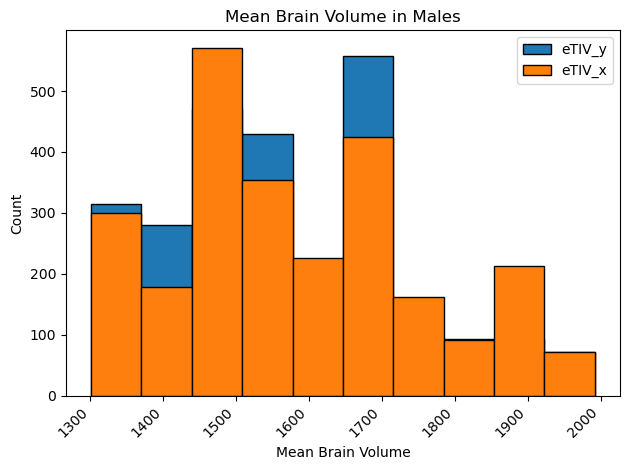

In [34]:
# This code segment filters data for males
# Then calculates the mean eTIV values for each unique combination of 'ID_x' and 'ID_y' within the male data subset.

male_data=brain_volume[brain_volume['M/F']=='M']
mean_male_eTIV=male_data.groupby(['ID_x', 'ID_y'])['eTIV_y', 'eTIV_x'].mean()
plt.figure(figsize=(10, 6))
mean_male_eTIV.plot(kind='hist', edgecolor='black')
plt.xlabel('Mean Brain Volume')
plt.ylabel('Count')
plt.title('Mean Brain Volume in Males')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/8t/lwxcj5gx513cjy7fr6l1ljx80000gn/T/ipykernel_25365/1307572456.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_female_eTIV=female_data.groupby(['ID_x', 'ID_y'])['eTIV_y', 'eTIV_x'].mean()


<Figure size 1000x600 with 0 Axes>

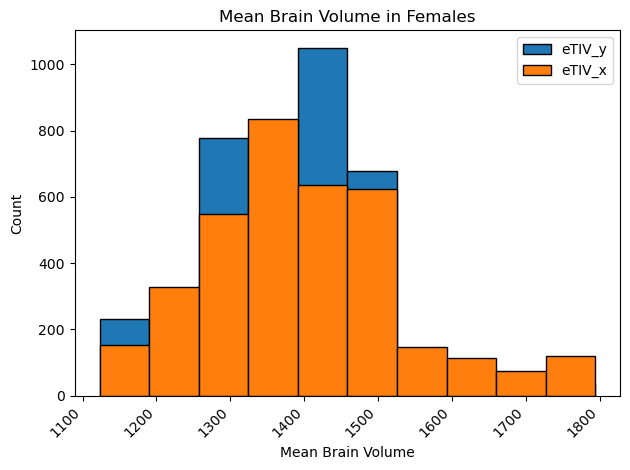

In [35]:
# This code segment filters data for females
# Then calculates the mean eTIV values for each unique combination of 'ID_x' and 'ID_y' within the female data subset.
female_data=brain_volume[brain_volume['M/F']=='F']
mean_female_eTIV=female_data.groupby(['ID_x', 'ID_y'])['eTIV_y', 'eTIV_x'].mean()


plt.figure(figsize=(10, 6))
mean_female_eTIV.plot(kind='hist', edgecolor='black')
plt.xlabel('Mean Brain Volume')
plt.ylabel('Count')
plt.title('Mean Brain Volume in Females')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Above is a visualizaiton which filters data for males and females respectively. Demonstrated on an overlayed histogram, we can see that between both datasets, there are very few female participatns that have a mean brain volume higher than 1500-1600. The heavier portion of brain volume for males lies skewed to the left as does the data for women, but differingly deomonstrating a strong average fo 1400 mm3 in brain volume.

For the sake of accuracy, we will be abandoning our combined dataset 'eTIV_combined' to perform a Pearson Correlation Coefficient task. Our reasoning for a PCC is to determine if there is a linear component associated between our two variables of concern: gender and associated brain volume. In seeing the strength of the correlation, we can make a good deterministic descision that brain volume in demented patients does differ between gender.

In [36]:
correlation = np.corrcoef(brain_volume['eTIV_x'], brain_volume['eTIV_y'])[0, 1]
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.302982850979866


The output Pearson correlation coefficient: 0.302982850979866 indicates a moderate positive correlation between the 'eTIV_x' and 'eTIV_y' columns in the dataset.


In [37]:
male_brain_volume = brain_volume[brain_volume['M/F'] == 'M']
female_brain_volume = brain_volume[brain_volume['M/F'] == 'F']

# Calculate Pearson correlation coefficient for male and female groups
male_correlation = np.corrcoef(male_brain_volume['eTIV_x'], male_brain_volume['eTIV_y'])[0, 1]
female_correlation = np.corrcoef(female_brain_volume['eTIV_x'], female_brain_volume['eTIV_y'])[0, 1]

print(f"Pearson correlation coefficient for males: {male_correlation}")
print(f"Pearson correlation coefficient for females: {female_correlation}")

Pearson correlation coefficient for males: -0.00029160691475869574
Pearson correlation coefficient for females: 0.009529753739218721


The output Pearson correlation coefficient for males: -0.00029160691475869574 indicates a very weak negative correlation (close to zero) for males, and Pearson correlation coefficient for females: 0.009529753739218721 indicates a very weak positive correlation (close to zero) for females. These values suggest that there is almost no linear relationship between the 'eTIV_x' and 'eTIV_y' columns for both males and females in this dataset.

According to a paper published by the National Library of Medicine, the mean brain volume for men is 1209 mm^3 while for women is is 1056 mm^3.</a>[<sup>1</sup>](#cite_note-1) Using these values, let's create a function that can take an input and determine whether that falls inside or outside the normal range for males or females. If the inputted value is less than the mean brain volume for the respective gender, it will output that it is a possible red flag. Our hope is that our small demo could be used as a small tool in diagnosis. 


1. <a name="cite_note-1"></a>[^](#cite_ref-1) National Library of Medicine. (2020, May). Aging and the Brain: A Quantitative Study of Clinical CT Images. *National Center for Biotechnology Information* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7228157/#:~:text=Brain%20Parenchymal%20Volume&text=The%20mean%20brain%20volume%20for,1056%20%C2%B1%20107.4%20cm3).

In [38]:
#    Checks if the brain volume in the input row falls within the normal range for males or females.
#    Parameters:
#    - row: pandas Series, containing information about a specific row including ID, brain volume, and gender.
#    - male_mean_brain_volume: float, mean brain volume for males.
#    - female_mean_brain_volume: float, mean brain volume for females.
#    Returns:
#    - str: A message indicating whether the brain volume is within normal range or a possible red flag

def check_brain_volume_normality(row, male_mean_brain_volume, female_mean_brain_volume):
    gender = row['M/F']
    brain_volume = row['Brain Volume']

    if gender == 'M' and brain_volume < male_mean_brain_volume:
        return "Possible red flag: Brain volume for males is below the normal range."
    elif gender == 'F' and brain_volume < female_mean_brain_volume:
        return "Possible red flag: Brain volume for females is below the normal range."
    else:
        return "Brain volume is within the normal range."

# Example usage/example row:
input_row = {'ID': 'OAS1_001', 'M/F': 'M', 'Brain Volume': 1180}
male_mean_volume = 1209  # Mean brain volume for males
female_mean_volume = 1056  # Mean brain volume for females

message = check_brain_volume_normality(input_row, male_mean_volume, female_mean_volume)
print(message)


Possible red flag: Brain volume for males is below the normal range.


### Summary of Findings

The findings from the analysis include:

1. **CDR Scoring and Brain Volume Distribution:**
   - The CDR Scoring Table helps clinicians assign ratings for dementia severity, with scores ranging from 0 (Normal) to 2 (Moderate Dementia).
   - Brain volume distributions in demented patients from two datasets average between 1200 to 1600 mm³, with the highest recorded brain volume reaching 2000 mm³.
   - The most frequent brain volume range for demented patients is between 1400-1500 mm³.

2. **Gender Differences and Dementia Severity:**
   - Visualizations show more very mild dementia cases in males than females, with overall fewer moderate dementia cases observed.
   - The analysis reveals differences in brain volume between genders, with males tending to have higher brain volumes, particularly in the 1400 mm³ range.

3. **Association between CDR and Brain Volume:**
   - Scatter plots demonstrate a negative correlation between Clinical Dementia Rating (CDR) and brain volume, suggesting lower brain volumes with increasing dementia severity.

4. **Pearson Correlation Coefficients:**
   - A moderate positive correlation is observed between brain volumes from the two datasets.
   - When examining male and female subsets separately, very weak correlations (close to zero) are found, indicating almost no linear relationship between brain volumes.

5. **Brain Volume Analysis by Gender:**
   - Histograms and violin plots show brain volume distributions by gender and CDR levels, indicating variations in brain volumes between males and females across dementia severity levels.

These findings suggest significant gender-based differences in brain volume distributions among demented patients, with implications for understanding dementia progression and potential diagnostic insights. Additionally, the function created to check if a patient's brain volume falls within the normal range for males or females based on mean values could suggest a potential diagnostic tool as it provides a possible red flags for volumes below the normal range

# Part 2: Preditictive Model Prototype

## Data Overview: Wrangling & Cleaning 

### Dataset #1 
- Name: Alzheimer MRI Preprocessed Dataset
- Link to dataset: https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset
- Number of images: 6400 MRI images

For this dataset, there are four different classes, folders, that separate the level of dementia a person has.
- Class - 1: Mild Demented (896 images)
- Class - 2: Moderate Demented (64 images)
- Class - 3: Non Demented (3200 images)
- Class - 4: Very Mild Demented (2240 images)


First we test to see if the moderate.jpg image opens. We utilzied the  Python Imaging Library (PIL) to do this. We first retrieved the image path and then used that path to process it through Image.open(). This method essentially opens the file and reads its components. Following this step, we wanted to convert that image into an array. Now that we know this works, we now want to turn the folders, which contain the different ranges of demented data, themselves into arrays. .</a>[<sup>1</sup>](#cite_note-1) 


1. <a name="cite_note-1"></a>[^](#cite_ref-1) Romanov. (1964, February 1). Iterate through folder with pillow image.open. Stack Overflow. https://stackoverflow.com/questions/51178166/iterate-through-folder-with-pillow-image-open 

In [2]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array
# https://www.pluralsight.com/resources/blog/guides/importing-image-data-into-numpy-arrays

# test to see if we can open an image and set the variable data as the array
img_path = 'Datasets/Moderate_Demented/moderate.jpg' 
image = Image.open(img_path)
data = asarray(image)


# test: 
print(image.format, image.size, image.mode)
print(data.size, data)
print(type(data)) #check to see if this is now an array 

JPEG (128, 128) L
16384 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>


The os.listdir() method allows us to parse through a folder of files, in the case of our project it is a folder full of images, and return a list of all of the allocated files. </a>[<sup>1</sup>](#cite_note-1) In the code bellow, we are parsing through each of the Datasets containing MRI images and turn those images into arrays. We utlized Mangesh Deshpande, the medium article, author code to help us parse through the allocated datasets folders to ensure they are .jpg and .jpeg images. </a>[<sup>2</sup>](#cite_note-2) Additionally, with each of the images, we used the img_to_array() to convert each of the i-th images into an array. We then appended each of the i-th images to the assigned array ist. The last step was to convert the array list to an array.


1. <a name="cite_note-1"></a>[^](#cite_ref-1) GeeksforGeeks. (2024, January 16). Python: Os.listdir() method. https://www.geeksforgeeks.org/python-os-listdir-method/ 
2. <a name="cite_note-2"></a>[^](#cite_ref-2) Deshpande, M. (2023, June 23). Working with image dataset to build CNN model in tensorflow. Medium. https://medium.com/@mangesh8374/working-with-image-dataset-to-build-cnn-model-in-tensorflow-f3dba0f72bfa 

In [4]:
mild_demented = 'Datasets/Mild_Demented'
img_files = os.listdir(mild_demented)
mild_demented_list = []
for i in img_files:
    if i.endswith('.jpg') or i.endswith('.jpeg'):
        img_path = os.path.join(mild_demented, i)
        img = load_img(img_path)
        img_array = img_to_array(img)
        mild_demented_list.append(img_array)
mild_demented_array = np.array(mild_demented_list)

print("Processed Mild Demented contains", len(mild_demented_list), "images.") # check to see the length of the list 
print("Processed Mild Demented with shape:", mild_demented_array.shape) # check to see the shape of the array

Very_Mild_Demented = 'Datasets/Very_Mild_Demented'
img_files = os.listdir(Very_Mild_Demented)
Very_Mild_Demented_list = []
for i in img_files:
    if i.endswith('.jpg') or i.endswith('.jpeg'):
        img_path = os.path.join(Very_Mild_Demented, i)
        img = load_img(img_path)
        img_array = img_to_array(img)
        Very_Mild_Demented_list.append(img_array)
Very_Mild_Demented_array = np.array(Very_Mild_Demented_list)

print("Processed Very Mild Demented contains", len(Very_Mild_Demented_list), "images.") # check to see the length of the list 
print("Processed Very Mild Demented with shape:", Very_Mild_Demented_array.shape) # check to see the shape of the array


Moderate_Demeneted = 'Datasets/Moderate_Demented'
img_files = os.listdir(Moderate_Demeneted)
Moderate_Demented_list = []
for i in img_files:
    if i.endswith('.jpg') or i.endswith('.jpeg'):
        img_path = os.path.join(Moderate_Demeneted, i)
        img = load_img(img_path)
        img_array = img_to_array(img)
        Moderate_Demented_list.append(img_array)
Moderate_Demented_array = np.array(Moderate_Demented_list)

print("Processed Moderate Demented contains", len(Moderate_Demented_list), "images.") # check to see the length of the list 
print("Processed Moderate Demented with shape:", Moderate_Demented_array.shape) # check to see the shape of the array


Non_Demented = 'Datasets/Non_Demented'
img_files = os.listdir(Non_Demented)
Non_Demented_list = []
for i in img_files:
    if i.endswith('.jpg') or i.endswith('.jpeg'):
        img_path = os.path.join(Non_Demented, i)
        img = load_img(img_path)
        img_array = img_to_array(img)
        Non_Demented_list.append(img_array)
Non_Demented_array = np.array(Non_Demented_list)

print("Processed Non Demented contains ", len(Non_Demented_list), "images.") # check to see the length of the list 
print("Processed Non Demented with shape:", Non_Demented_array.shape) # check to see the shape of the array

Processed Mild Demented contains 895 images.
Processed Mild Demented with shape: (895, 128, 128, 3)
Processed Very Mild Demented contains 2239 images.
Processed Very Mild Demented with shape: (2239, 128, 128, 3)
Processed Moderate Demented contains 64 images.
Processed Moderate Demented with shape: (64, 128, 128, 3)
Processed Non Demented contains  2418 images.
Processed Non Demented with shape: (2418, 128, 128, 3)


We then want to use the numpy concatenate function in order to concatnate all of the Mild, Moderate Demented, Very Mild Demented, and Non-Demented arrays into one big array of data. Our goal here is to have tangable values of the data to do some data analysis and use machine learning techniques. We also created an array with only dementia data, that is, Non-Demented data is not in this array. 

In [5]:
all_demented_datasets_array = np.concatenate((mild_demented_array, Moderate_Demented_array, Very_Mild_Demented_array), axis=0)
is_array = isinstance(all_demented_datasets_array, np.ndarray) # make sure all_demented_datasets_array is an array 
print('all_demented_datasets_array shape', all_demented_datasets_array.shape)
print(is_array) #check to ensure that all_demented_datasets_array is an array 

all_datasets_array = np.concatenate((mild_demented_array, Moderate_Demented_array,Non_Demented_array, Very_Mild_Demented_array), axis=0)
is_array2 = isinstance(all_datasets_array, np.ndarray) # make sure all_demented_datasets_array is an array 
print('all_datasets_array', all_datasets_array.shape)
print(is_array2) #check to ensure that all_demented_datasets_array is an array 

all_demented_datasets_array shape (3198, 128, 128, 3)
True
all_datasets_array (5616, 128, 128, 3)
True


In [6]:
#make 2D arrays: 
two_dim_all_datasets_array = all_datasets_array.reshape(5616, 49152)
print('all_datasets_array reshape', two_dim_all_datasets_array.shape)

two_dim_all_demented_datasets_array = all_demented_datasets_array.reshape(3198, 49152)
print('all_demented_datasets_array reshape', two_dim_all_demented_datasets_array.shape)




all_datasets_array reshape (5616, 49152)
all_demented_datasets_array reshape (3198, 49152)


Now, we want to visualize some of the array data. So in this case, we used a 2-D Heat Map. In the code below implemented from Geeks for Geeks, we can see that for the generated random points, there are many instances of 

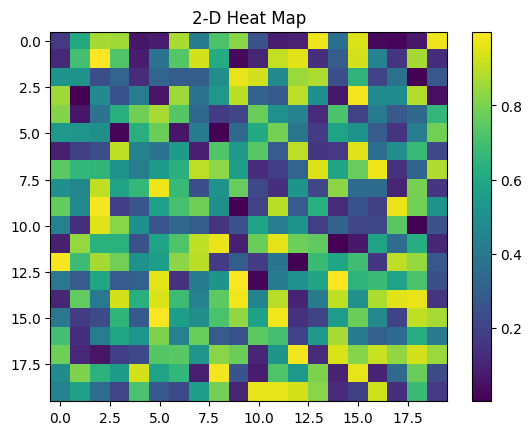

In [13]:
plt.imshow(two_dim_all_demented_datasets_array, cmap='viridis', aspect='auto',interpolation='nearest')
plt.title( "2-D Heat Map" ) 
plt.colorbar() 
plt.show()

# need to cite: https://www.geeksforgeeks.org/how-to-draw-2d-heatmap-using-matplotlib-in-python/

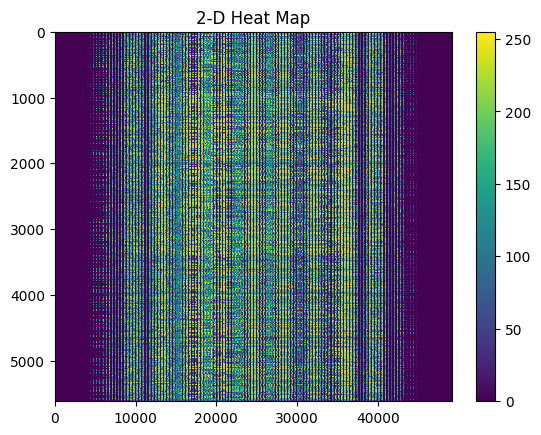

In [12]:
plt.imshow(two_dim_all_datasets_array, cmap='viridis', aspect='auto',interpolation='nearest')
plt.title( '2-D Heat Map') 
plt.colorbar() 
plt.show()

# need to cite: https://www.geeksforgeeks.org/how-to-draw-2d-heatmap-using-matplotlib-in-python/

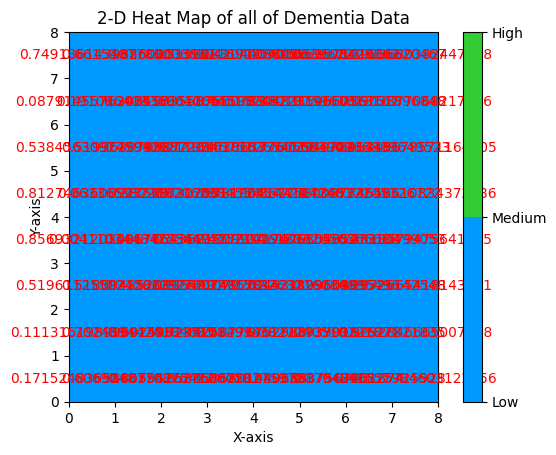

In [14]:
import matplotlib.colors as colors 

# Create a custom color map 
# with blue and green colors 
colors_list = ['#0099ff', '#33cc33'] 
cmap = colors.ListedColormap(colors_list) 

# Plot the heatmap with custom colors and annotations 
plt.imshow(two_dim_all_demented_datasets_array, cmap=cmap, vmin=0, vmax=100, extent=[0, 8, 0, 8]) 
for i in range(8): 
	for j in range(8): 
		plt.annotate(str(two_dim_all_demented_datasets_array[i][j]), xy=(j+0.5, i+0.5), 
					ha='center', va='center', color='red') 

# Add colorbar 
cbar = plt.colorbar(ticks=[0, 50, 100]) 
cbar.ax.set_yticklabels(['Low', 'Medium', 'High']) 

# Set plot title and axis labels 
plt.title("2-D Heat Map of all of Dementia Data") 
plt.xlabel("X-axis") 
plt.ylabel("Y-axis") 

# Display the plot 
plt.show() 


According to the sklearn website, the  make_blobs() function essentially creates 'isotropic (spherical) gaussian blobs'. This means that the data is normally distrubuted, and when displayed creates like a bell curve. </a>[<sup>1</sup>](#cite_note-1) Essentially, we use kmeans as a method of unsupervised machine learning. </a>[<sup>2</sup>](#cite_note-2)  Since the MRI neural images do not have labels, our goal with Kmeans was to cluster the different four different classes of dementia. We utilized the documentation on the sklearn website to generate data and visualize our results. </a>[<sup>3</sup>](#cite_note-3) 

1. <a name="cite_note-1"></a>[^](#cite_ref-1) Kmeans. scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans 
2. <a name="cite_note-2"></a>[^](#cite_ref-2) Khan, M. (2017, August 2). KMEANS clustering for classification. Medium. https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a 
3. <a name="cite_note-3"></a>[^](#cite_ref-3) KmeaDemonstration of k-means assumptionsns. scikit. (n.d.). https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py


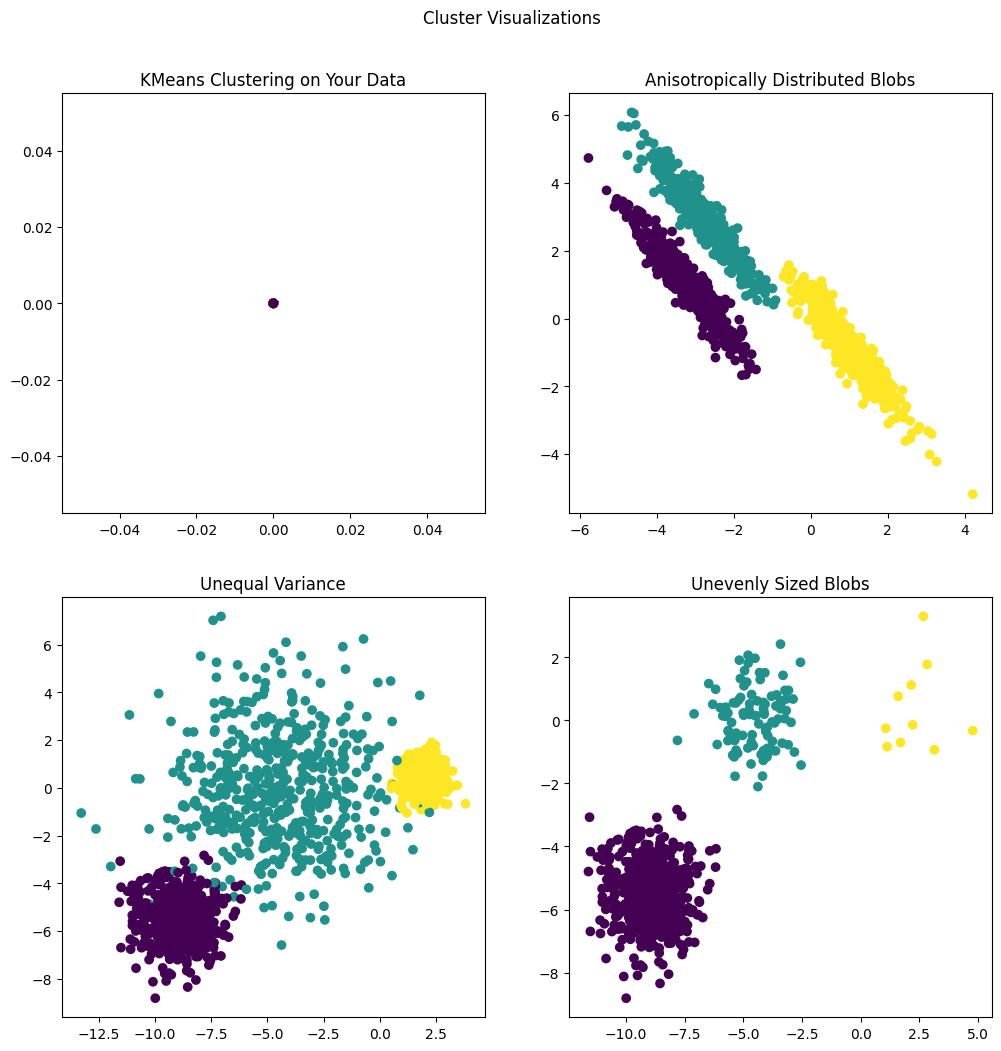

In [26]:
# https://medium.com/codex/learning-image-classification-with-cnn-using-tensorflow-4875fdd3ce62

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(two_dim_all_datasets_array)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state) # Use the make_blobs function here to generate the gausian blobs
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)  # Unequal variance
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axs[0, 0].scatter(two_dim_all_datasets_array[:, 0], two_dim_all_datasets_array[:, 1], c=labels)
axs[0, 0].set_title('KMeans Clustering on Your Data')

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title('Anisotropically Distributed Blobs')

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title('Unequal Variance')

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title('Unevenly Sized Blobs')

plt.suptitle('Cluster Visualizations').set_y(0.95)
plt.show()



### Hugging Face

In [53]:
# https://huggingface.co/docs/datasets/en/loading
from datasets import load_dataset
dataset = load_dataset("enriqfatima/alzheimer_datset") #different folders, not images all in one folder. 
print(dataset.keys())

Resolving data files:   0%|          | 0/364 [00:00<?, ?it/s]

dict_keys(['train'])


In [54]:
train_test_dataset = load_dataset("enriqfatima/test.train")
print(train_test_dataset.keys())

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

dict_keys(['train'])


### CNN video


https://www.youtube.com/watch?v=jztwpsIzEGc
Install Depedencies and Setup

In [ ]:
#conda install tensorflow tensorflow-gpu opencv-python matplotlib

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - tensorflow-gpu
  - opencv-python

Current channels:

  - defaults
  - https://conda.anaconda.org/conda-forge/noarch
  - https://conda.anaconda.org/conda-forge/osx-64

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [58]:
#avoids memory issues
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [59]:
data_dir = 'Datasets'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [60]:
# os.listdir(os.path.join(data_dir, 'Moderate_Demented'))
# # under 9 kb, maybe get rid of it


# x = 0
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             x+=1
#     print(x)
#             # os.remove(image_path)
#15 min in video

In [ ]:
#loading data
data = tf.keras.utils.image_dataset_from_directory('Datasets')
#createing a dataset, sort it into one variable
data_iterator = data.as_numpy_iterator()
#grabs that data, iterates through the files
batch = data_iterator.next()


Found 5537 files belonging to 4 classes.


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('Datasets')
data = tf.keras.utils.image_dataset_from_directory('Datasets')
batch = data_iterator.next()

Found 6433 files belonging to 5 classes.
Found 6433 files belonging to 5 classes.


In [ ]:
#class 1 = second 
#Class 0 = first
batch[1]
batch[0].shape

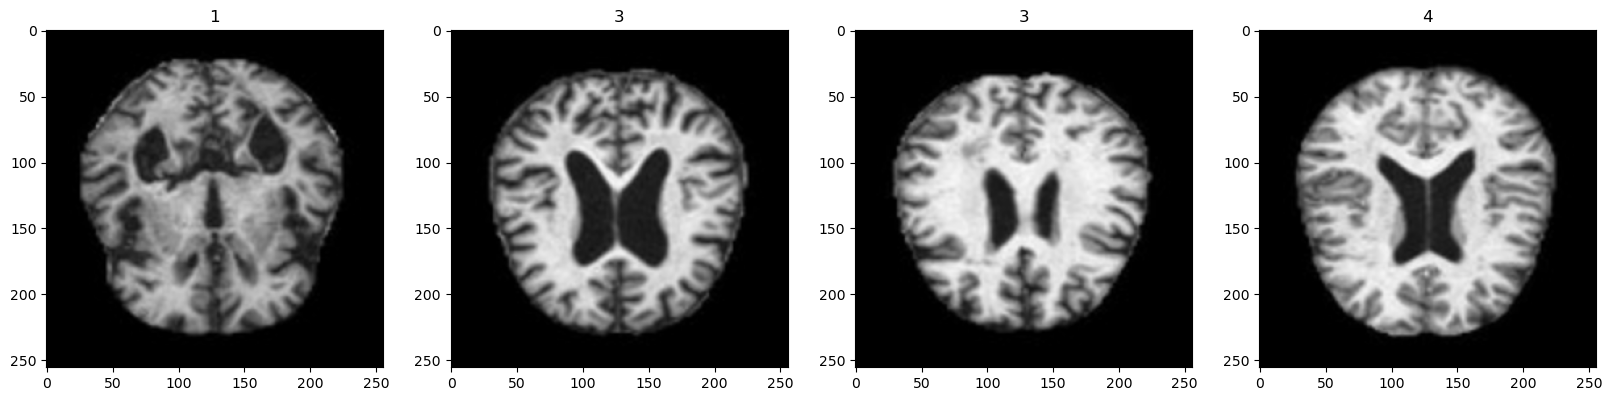

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
#scales the data, make it easier to process
data.as_numpy_iterator().next();

In [ ]:
len(data)

202

In [ ]:
#allocating data
train_size = int(len(data)*.7)
    #70% of the data for training
val_size = int(len(data)*.2)
    #used during training
test_size = int(len(data)*.1)+1
    #used post training
test_size + val_size + train_size

202

In [ ]:
#data was shuffled earlier, between the 4 folders
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

141

###Deep learning part

In [ ]:
#import functional? 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

In [ ]:
#Creating layers

#1st layer, must have input
#16 filters, scan and infer a output
#filter size is (3,3) pixels
#stride of 1: moves one pixel at a time
#relu activation, pass it throughh a function, preserve pos value,s anything that is neg is 0
#Maxpolling:2D: reduce the image data by half
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#Flatten, condese it into 1 dimension
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#compile 
#optimizer, loss: this should be diff, 
#tf.optimizers. (thers alot of htem)
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
#actual training section
logdir='log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
#model.fit : training, model.predict: prediction
#train: 4 batch fo 32 img, epoch: how many times we run the traiing fata
#val: evaluating our model, callback: do tensorboard_callback

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
141/141 [==============================] - 110s 763ms/step - loss: -1456577.7500 - accuracy: 0.1407 - val_loss: -10796079.0000 - val_accuracy: 0.1305
Epoch 2/20
141/141 [==============================] - 111s 787ms/step - loss: -220588784.0000 - accuracy: 0.1410 - val_loss: -778997184.0000 - val_accuracy: 0.1258
Epoch 3/20
141/141 [==============================] - 111s 782ms/step - loss: -3397764096.0000 - accuracy: 0.1416 - val_loss: -8057587200.0000 - val_accuracy: 0.1312
Epoch 4/20
141/141 [==============================] - 106s 748ms/step - loss: -20350697472.0000 - accuracy: 0.1427 - val_loss: -38250971136.0000 - val_accuracy: 0.1227
Epoch 5/20
141/141 [==============================] - 106s 751ms/step - loss: -76300967936.0000 - accuracy: 0.1385 - val_loss: -126595588096.0000 - val_accuracy: 0.1250
Epoch 6/20
141/141 [==============================] - 108s 762ms/step - loss: -211925762048.0000 - accuracy: 0.1410 - val_loss: -320879820800.0000 - val_accuracy: 0.1227
Ep

In [ ]:

batch[1]

array([1, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 0, 3, 4, 3, 4, 4, 3, 3, 4,
       4, 0, 3, 4, 4, 4, 3, 4, 0, 4], dtype=int32)